# Astr 257 Test Assignment, Aditya Sengupta

In [2]:
!which python

/Users/adityasengupta/opt/anaconda3/envs/astr257/bin/python


In [3]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval
from matplotlib import pyplot as plt
import numpy as np
from os import path
from photutils.centroids import centroid_sources, centroid_com

In [4]:
datapath = "../../Project 1--Pluto/Data (from Arcelia)/"
getlims = ZScaleInterval().get_limits

In [19]:
def fname_to_data(fname, day=0):
    if day == 1:
        k = ""
    else:
        k = "0"
    return np.dstack([fits.open(path.join(datapath, "pluto" + str(day), fname + k + str(i+(1-day)) + ".fits"))[0].data for i in range(5)])

def view_as_ds9(img):
    vmin, vmax = getlims(img)
    plt.imshow(img, vmin=vmin, vmax=vmax)

darks, sciences, biases, flats = [fname_to_data(x).astype(np.float64) for x in ["dark", "science", "bias", "flat"]]


In [6]:
# flats are 10s but others are 30s, so correcting for that
flats_minus_darks = (flats - darks / 3 - biases) * 3# + biases + darks
corr_sciences = (sciences - darks) / flats_minus_darks
science = np.nanmedian(corr_sciences, axis=2)

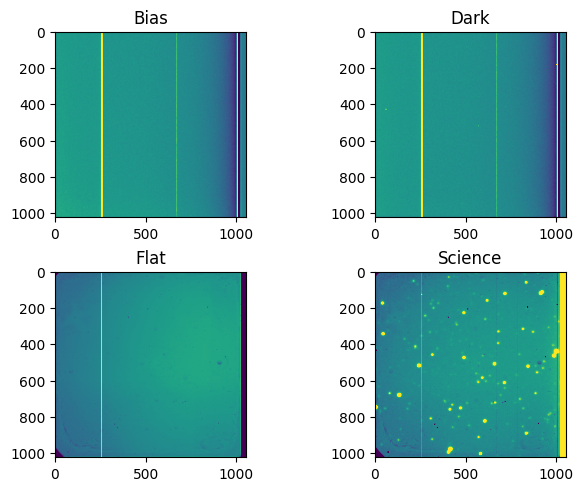

In [7]:
dark, bias, flat = (np.nanmedian(x, axis=2) for x in [darks, biases, flats])
mosaic="AB;CD"
fig = plt.figure(constrained_layout=True)
ax_dict = fig.subplot_mosaic(mosaic)
for (pos, d, n) in zip(['A', 'B', 'C', 'D'], [bias, dark, flat, science], ["Bias", "Dark", "Flat", "Science"]):
    vmin, vmax = getlims(d)
    im = ax_dict[pos].imshow(d, vmin=vmin, vmax=vmax)
    ax_dict[pos].set_title(n)
    # plt.colorbar(im, ax=ax_dict[pos])


In [20]:
sciences1 = fname_to_data("science", day=1)
corr_sciences1 = (sciences1 - darks) / flats_minus_darks
science1 = np.nanmedian(corr_sciences1, axis=2)

In [25]:
fits.PrimaryHDU(science).writeto("pluto0_corr.fits")
fits.PrimaryHDU(science1).writeto("pluto1_corr.fits")

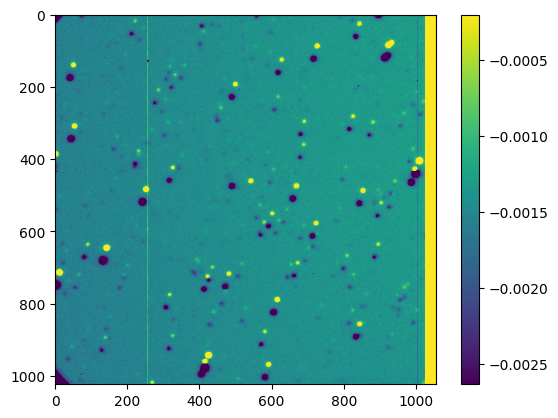

In [23]:
view_as_ds9(science1 - science)
plt.colorbar()